In [1]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import statistics

The following cell will establish an empty dataframe into which we can record our data. There are 5 lines to test, each with 3 runs.

In [2]:
df = pd.read_csv('data.csv')
df.head(10)

,line,run,n,B
0,523,1,0.00,0.0
1,523,1,0.25,1.0
2,523,1,0.50,2.0
3,523,2,0.00,0.0
4,523,2,0.25,2.0
5,523,2,0.50,4.0
6,523,3,0.00,0.0
7,523,3,0.25,3.0
8,523,3,0.50,6.0
9,2,1,0.00,0.0


In [3]:
def linear(x, m, b):
    return m * x + b

def get_fit_line_params(df, line, run):
    df_filtered = df[(df['line'] == line) & (df['run'] == run)]
    popt, pcov = optimize.curve_fit(
        linear,
        xdata=df_filtered['n'],
        ydata=df_filtered['B']
    )
    return popt, pcov

In [4]:
# Constants for getting g-factor
h = 6.62607015e-34 # J*s, Planck's constant
c = 3e8 # m/s, speed of light
l = 9.995e-3 # m, FPI width
nu_f = c / (2 * l) # Hz, free spectral range
mu_B = 9.274009994e-24  # J/T, Bohr magneton

def get_g_factor(df, line, run):
    popt, _ = get_fit_line_params(df, line, run)
    slope = popt[0]
    g_factor = (h * nu_f) / (slope * mu_B)
    return g_factor

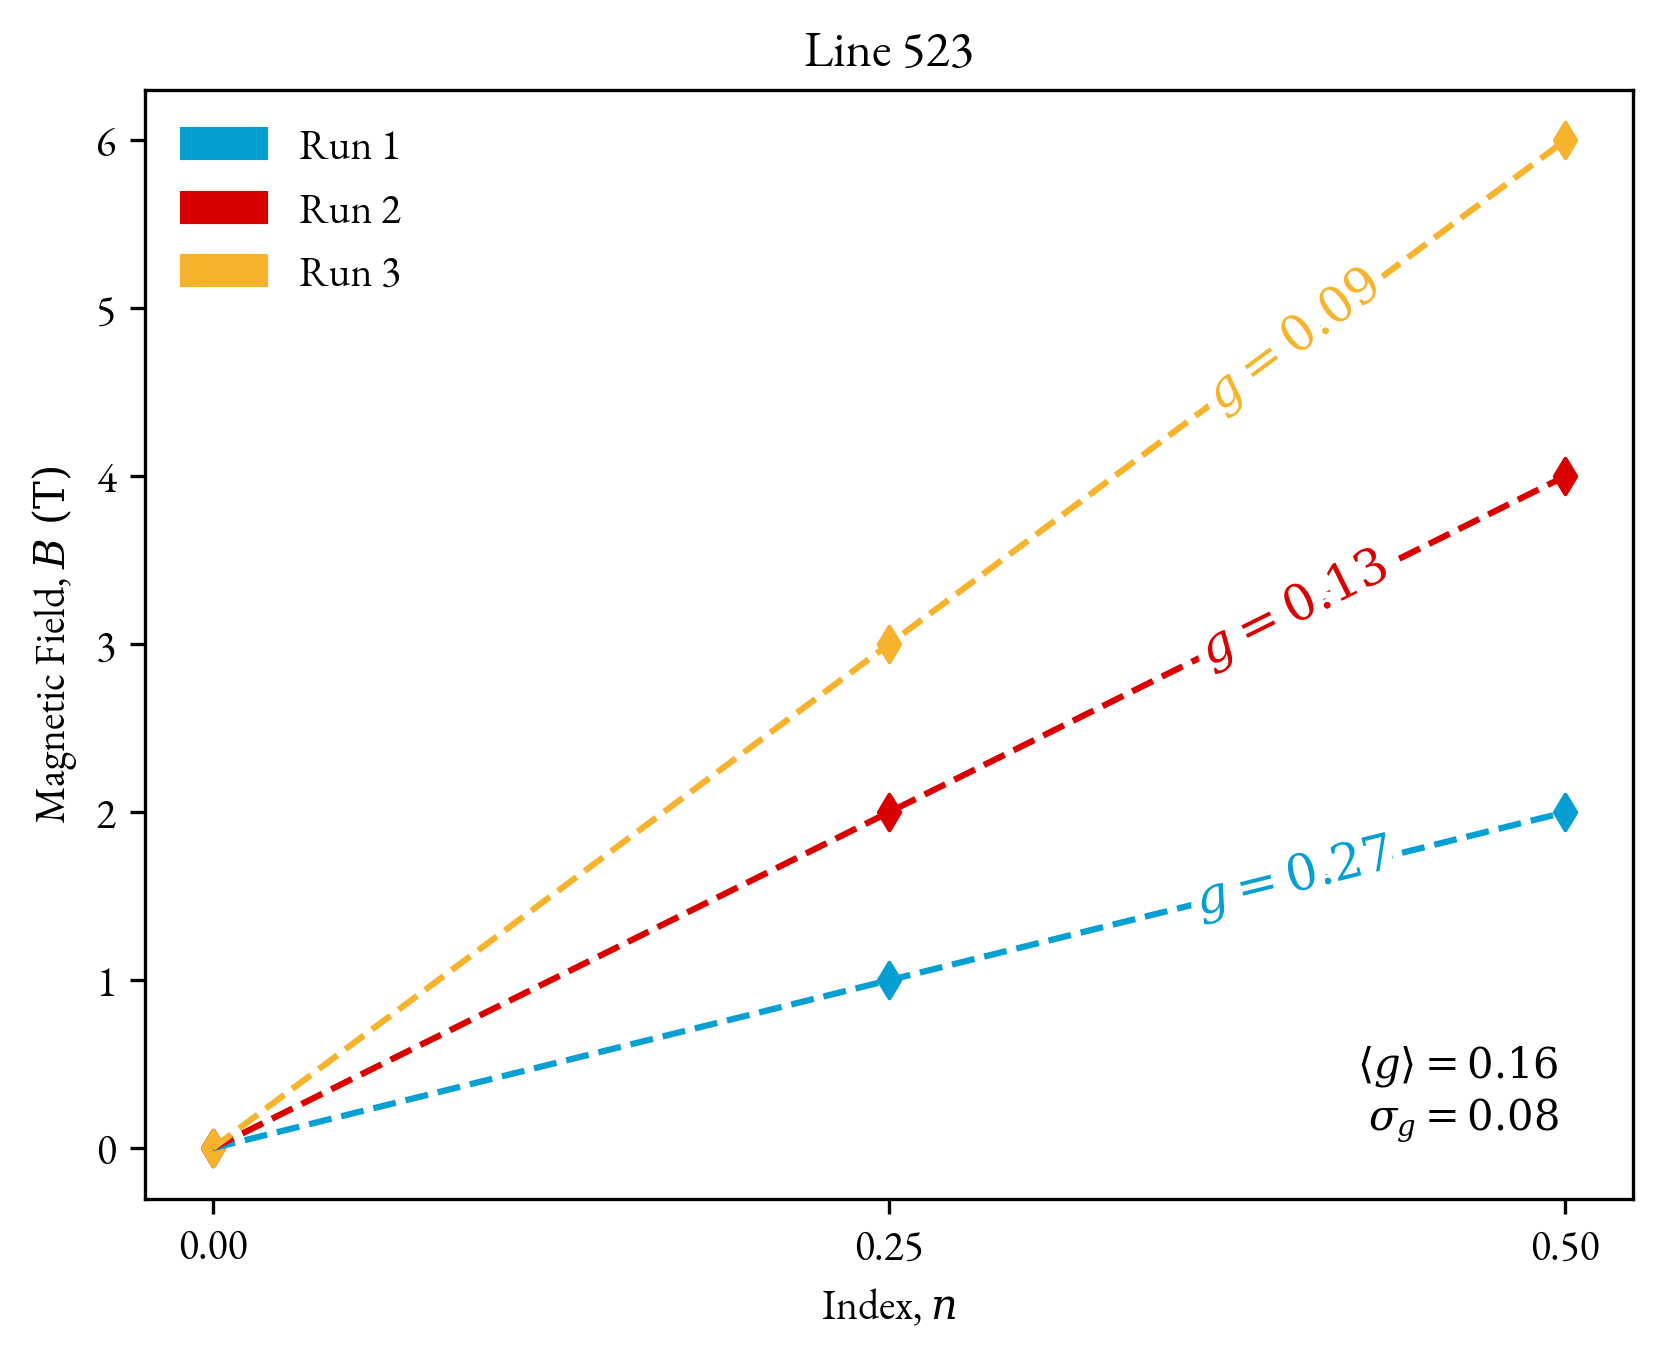

/var/folders/69/b04kj0ls1jz_lb6g_l79x1tw0000gn/T/ipykernel_46844/1942275200.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  g_factor = (h * nu_f) / (slope * mu_B)
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


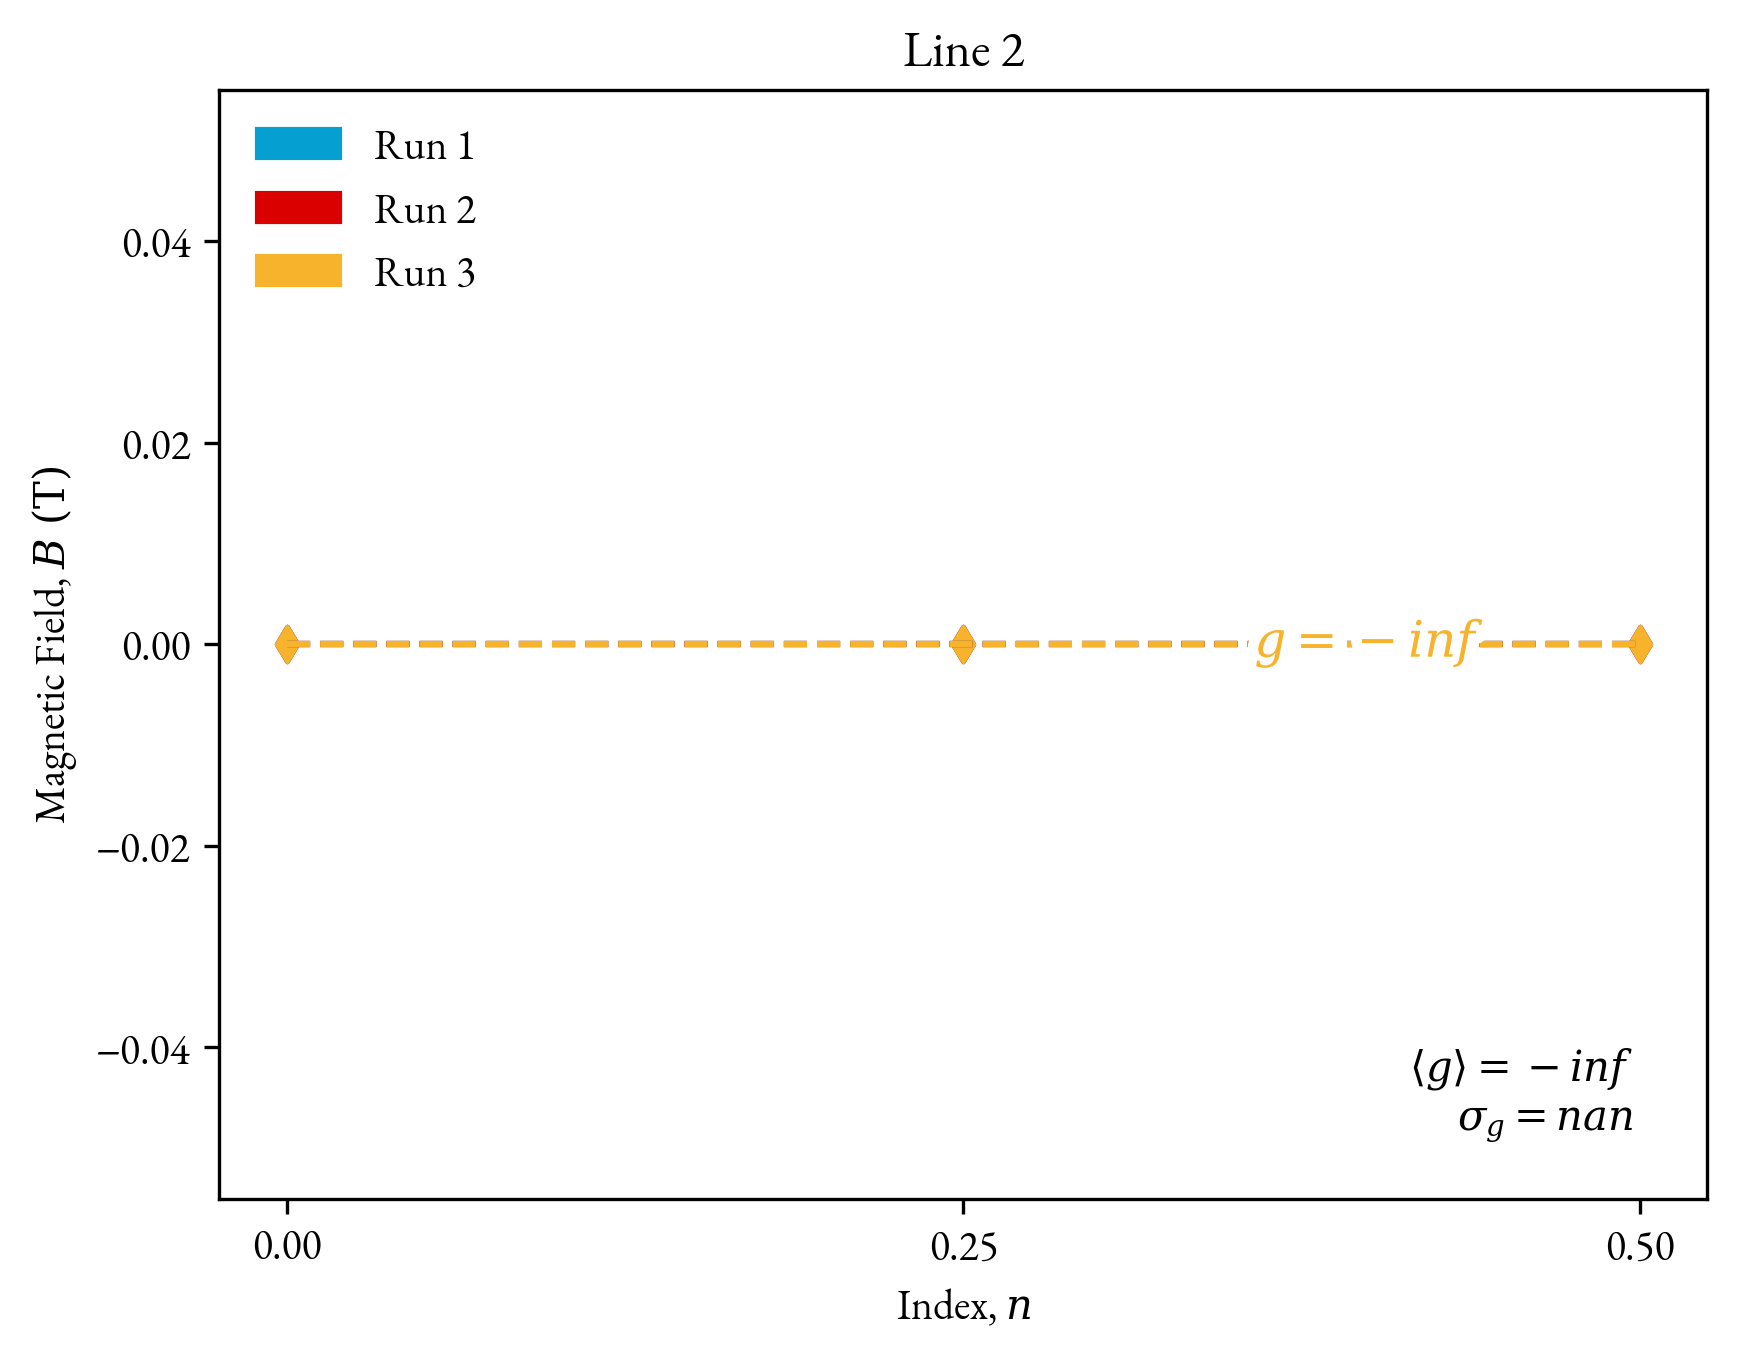

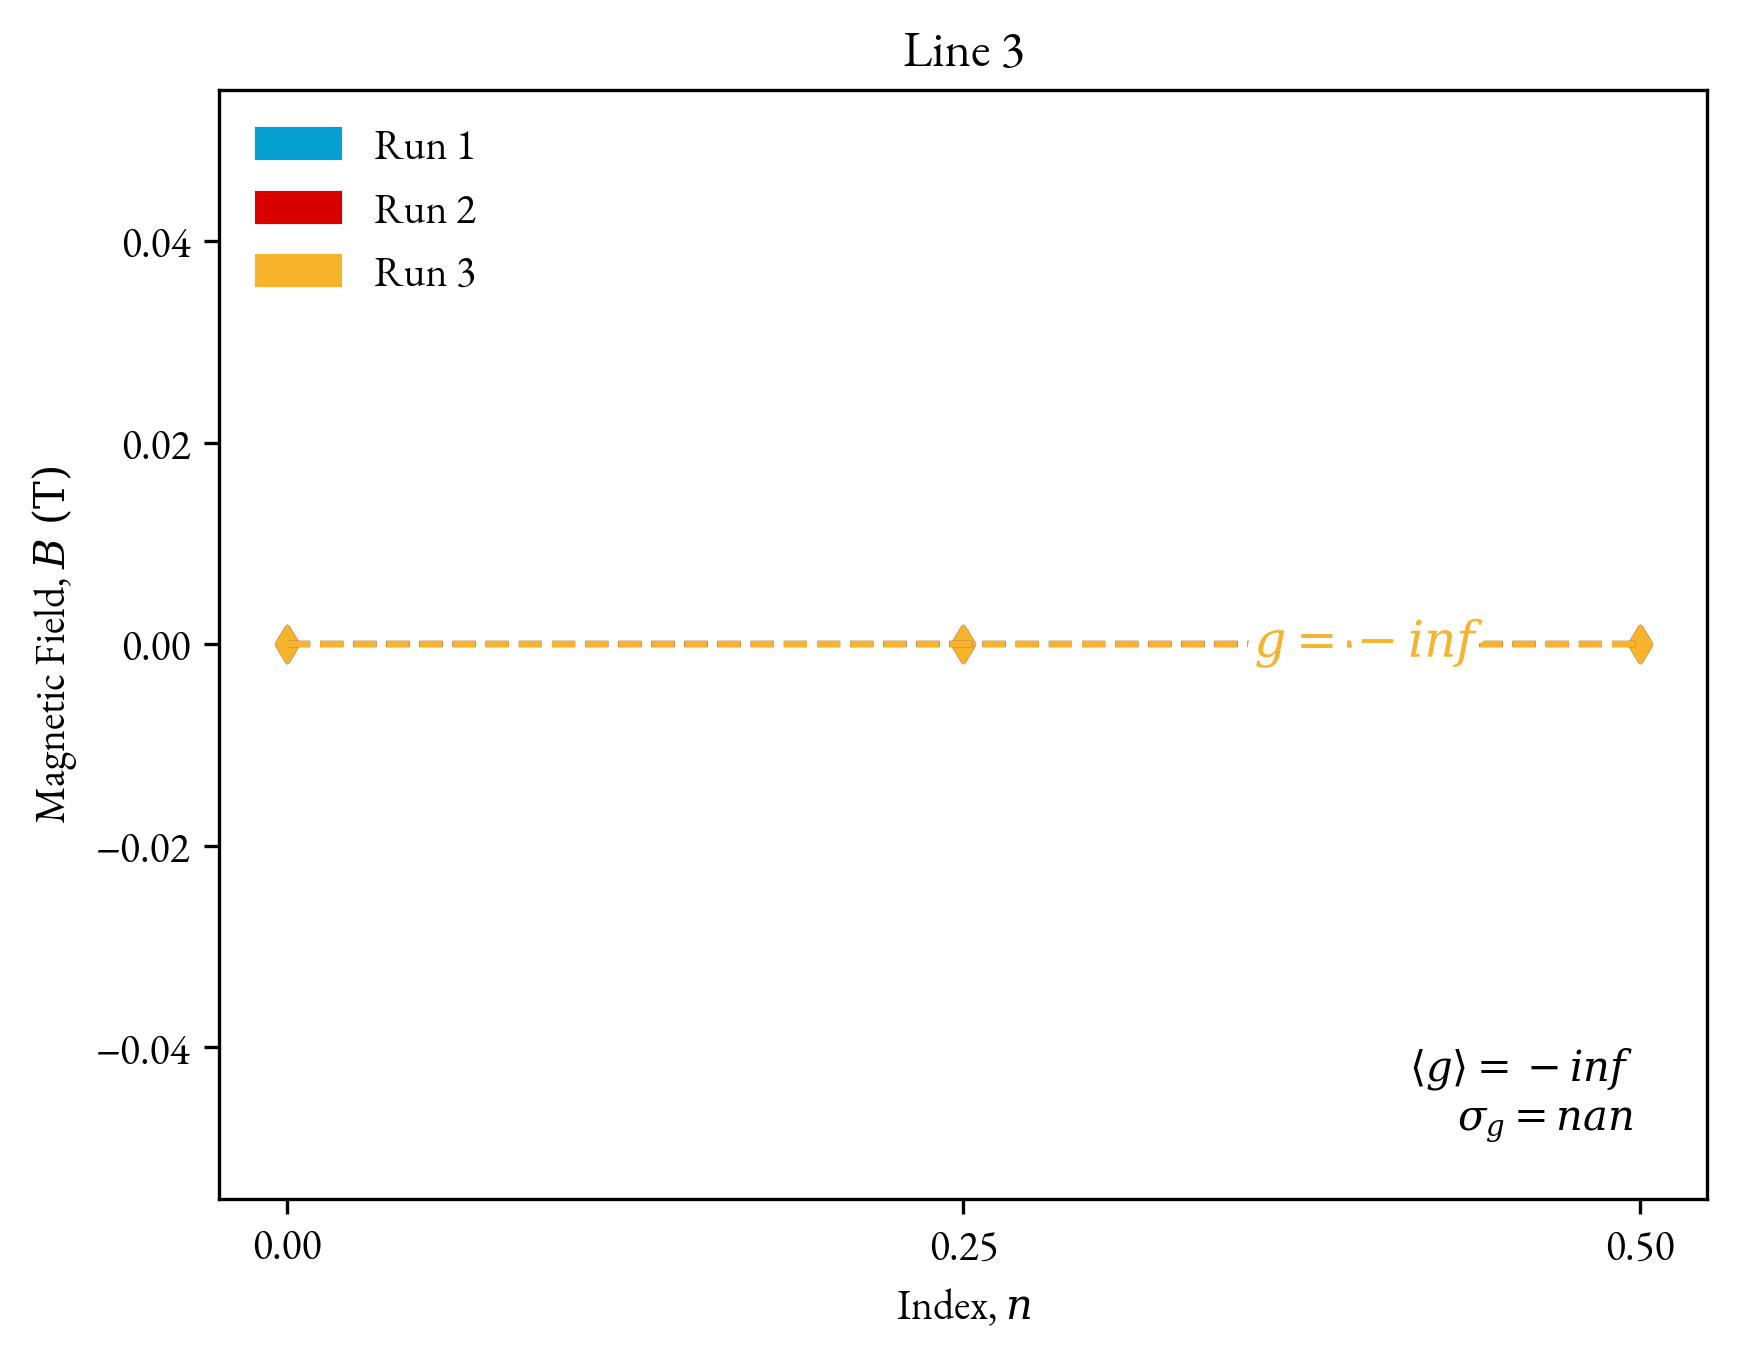

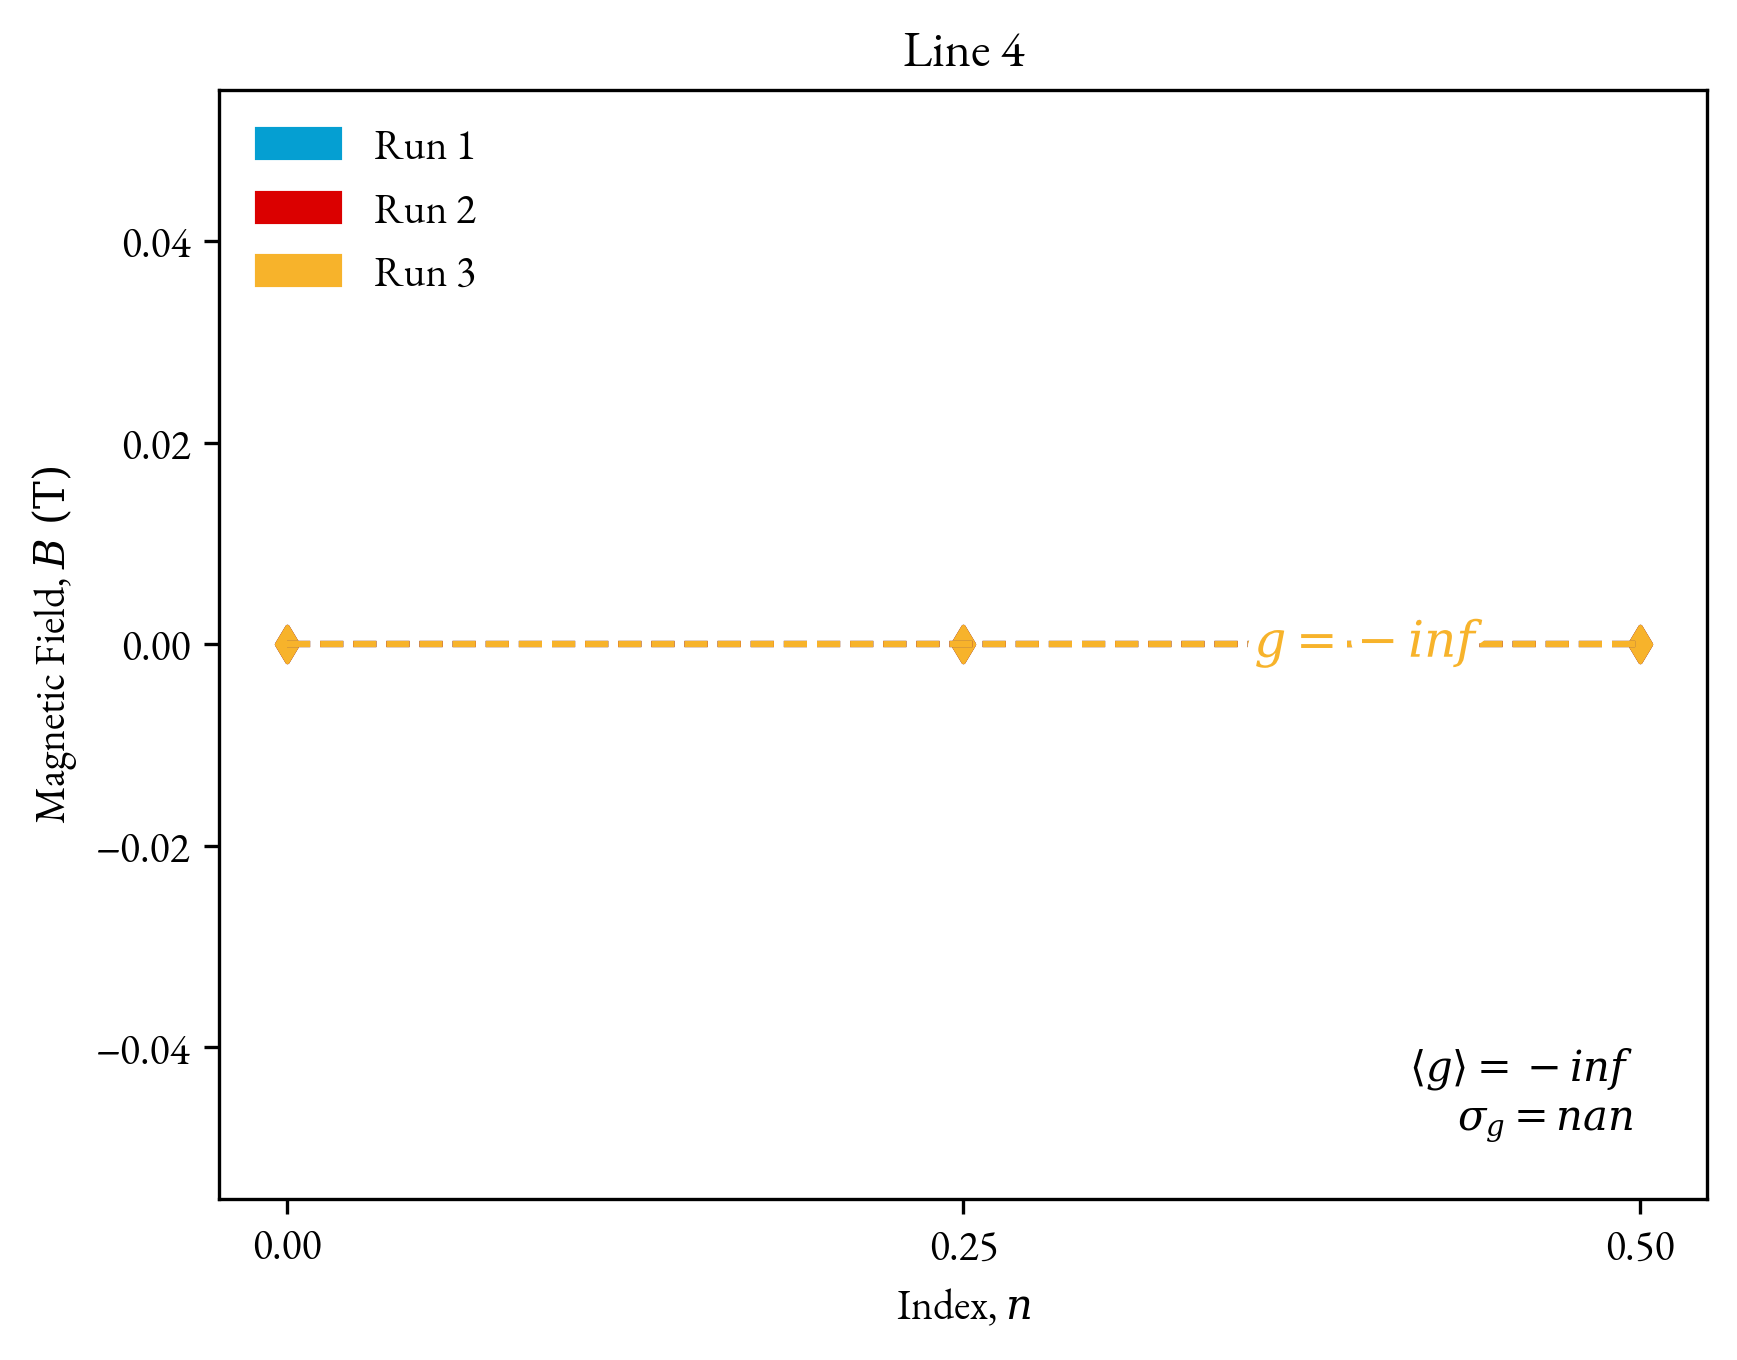

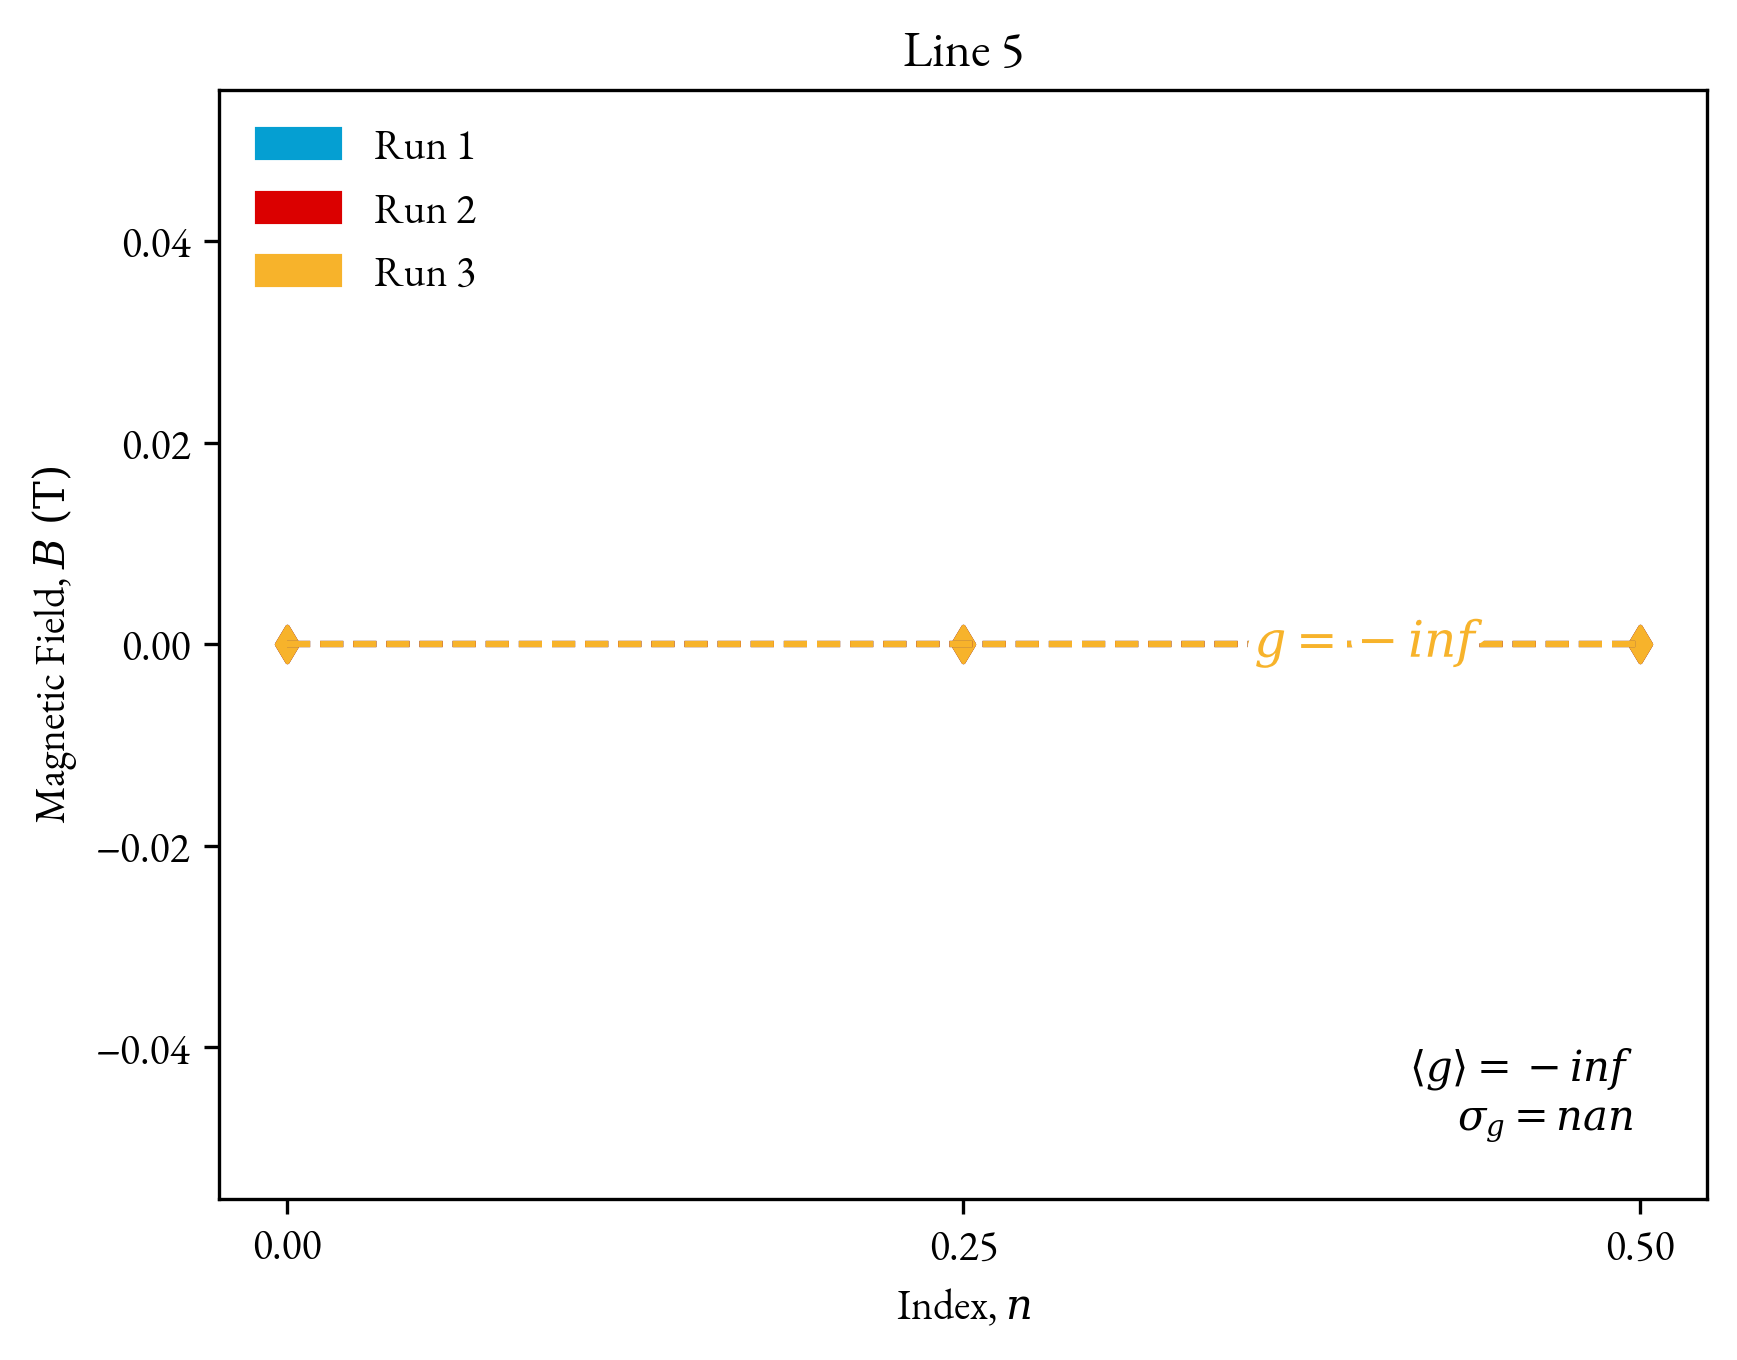

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from labellines import labelLines
import numpy as np

plt.style.use('default')
plt.rcParams['figure.dpi'] = 300
font = "EB Garamond"
plt.rcParams["font.family"] = font
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

def make_plot_with_fits(df, line):
    df = df[df['line'] == line]
    g_factors = []
    colors = ['#059FD2', '#DB0000', '#F7B32B']
    for i, run in enumerate(df['run'].unique()):
        plt.scatter(data=df[df['run'] == run], x='n', y='B', label='_nolegend_', marker='d', color=colors[i])
        popt, pcov = get_fit_line_params(df, line, run)
        x = np.linspace(df['n'].min(), df['n'].max(), 100)
        y = linear(x, *popt)
        g = get_g_factor(df, line, run)
        g_factors.append(g)
        fit_line = plt.plot(x, y, '--', label=f'$g = {g:.2f}$', color=colors[i])

    mean_g = np.mean(g_factors)
    std_g = np.std(g_factors)
    legend_text = f'$\\langle{{}} g\\rangle{{}} = {mean_g:.2f}$\n$\\sigma_g = {std_g:.2f}$'
    plt.text(0.95, 0.05, legend_text, transform=plt.gca().transAxes, ha='right', va='bottom')
    
    # Create a custom legend with colored rectangles
    legend_patches = [patches.Patch(color=colors[i], label=f'Run {i+1}') for i in range(len(df['run'].unique()))]
    plt.legend(handles=legend_patches, loc='upper left', bbox_transform=plt.gca().transAxes, frameon=False)

    labelLines(plt.gca().get_lines(), fontsize=12, xvals=[0.4, 0.4, 0.4])
    plt.xticks(np.arange(df['n'].min(), df['n'].max() + 0.25, 0.25))
    plt.title(f'Line {line}')
    plt.xlabel('Index, $n$')
    plt.ylabel(r'Magnetic Field, $B\ (\mathrm{T})$')
    plt.show()

for line in df['line'].unique():
    make_plot_with_fits(df, line)